# Run SWOT denoising module

* Emmanuel Cosme, 21/02/2018
* test des entrées/sorties du module SWOTdenoise

## Imports et fichier d'entrée

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr

import SWOTdenoise as swotd
#filedir = '/Users/cosme/data/NATL60/MED-BOX/'
#filename = filedir+'MED_1km_nogap_FMA13_swotFastPhase_BOX_c01_p009.nc'
filedir = '/Users/cosme/data/NATL60/SWOT_fast_sampling_simulation_cycle1_passes/'
filename = filedir+'MED_fastPhase_1km_swotFAST_c01_p009.nc'

## 1. Denoising en entrant le nom du fichier comme paramètre

En sortie : adresse et nom du fichier de sortie. Ici la méthode invoquée est "do_nothing", qui ne fait rien.

In [2]:
swotd.SWOTdenoise(filename, method='do_nothing')

Filtered field in  /Users/cosme/data/NATL60/SWOT_fast_sampling_simulation_cycle1_passes/MED_fastPhase_1km_swotFAST_c01_p009_denoised.nc


### Plots pour comparaison avec le fichier d'entrée


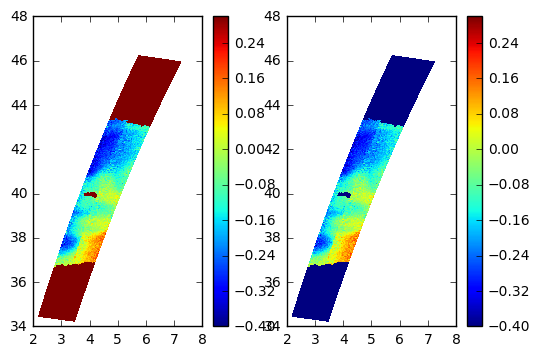

In [4]:
ds = xr.open_dataset(filedir+'MED_fastPhase_1km_swotFAST_c01_p009_denoised.nc')
plt.subplot(1,2,1)
cs = plt.pcolormesh(ds.lon, ds.lat, ds.SSH, vmin=-0.4, vmax=0.3)
plt.colorbar(cs)
ds2 = xr.open_dataset(filedir+'MED_fastPhase_1km_swotFAST_c01_p009.nc')
plt.subplot(1,2,2)
cs2=plt.pcolormesh(ds2.lon, ds2.lat, ds2.SSH_obs,vmin=-0.4, vmax=0.3)
plt.colorbar(cs2)

## 2. Denoising en entrant les champs dans la fonction

D'abord, on lit les champs dans le fichier d'entrée. Pour cela, on utilise ici la fonction ```read_data``` du module, mais ce n'est pas obligatoire.

In [5]:
ssh, lon, lat, xac, time = swotd.read_data(filename, 'SSH_obs', 'lon', 'lat', 'x_ac', 'time')

Puis on calcule le champ de SSH débruité :

In [6]:
ssh_out = swotd.SWOTdenoise(ssh=ssh, lon=lon, lat=lat, x_ac=xac, time=time, method='do_nothing')

### Plot:

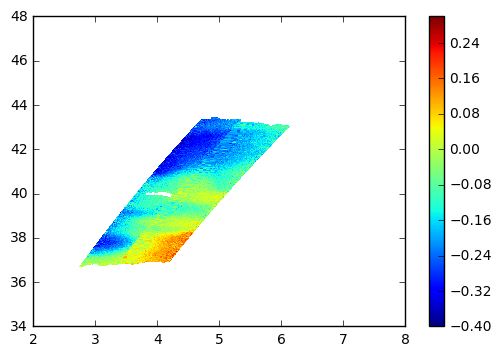

In [7]:
cs=plt.pcolormesh(lon, lat, ssh_out,vmin=-0.4, vmax=0.3)
plt.colorbar(cs)

In [8]:
swotd.SWOTdenoise(method='do_nothing')

You must provide a SWOT file name OR SSH, lon, lat, x_ac and time arrays


SystemExit: 

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [9]:
swotd.SWOTdenoise(ssh='SSH_obs')

You must provide a SWOT file name OR SSH, lon, lat, x_ac and time arrays


SystemExit: 

In [11]:
type(ssh)

numpy.ma.core.MaskedArray